## Importing and cleaning information for the analysis

In [1]:
# Importing Libraries
import ast # To convert the skils to a list
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data (Job postings)
df = pd.read_csv(r"C:\Users\WIN10\Desktop\Job_Analysis_2025\Job_CSV\jobs_postings.csv")


# Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Create the column month (data will be analyzed monthly)

df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')

# Filter by the year and sorting by month
df_2025 = df[df['job_posted_date'].dt.year == 2025].copy()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_2025['job_posted_month'] = pd.Categorical(
    df_2025['job_posted_month'],
    categories=month_order,
    ordered=True
)

## What are the most demanded skills for the top 5 most popular data roles?

### Metholodgy
1. Clean-up skill column
2. Calculate skill count based on job title ('job_title_short' on our Dataset)
3. Calculate skill percentage
4. Plot final findings

#### Getting the jobs postings for Canada and exploding the column df_skills

In [18]:
# Get the jobs information for Canada

df_ca = df_2025[df_2025['job_country'] == 'Canada']

# Explode the skills columns to get the data for the most demanded ones

df_skills = df_ca.explode('job_skills')

#### Grouping to get the count of skills and getting the top 5 jobs

In [19]:
# Getting the count for the skills based on the job role

df_skills_count = (df_skills.groupby(['job_skills', 'job_title_short'])
                   .size()
                   .reset_index(name='skill_count')
                   .sort_values(by='skill_count', ascending=False))

# Top three job titles
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = job_titles[:5]

#### Plotting count of top skills for data roles

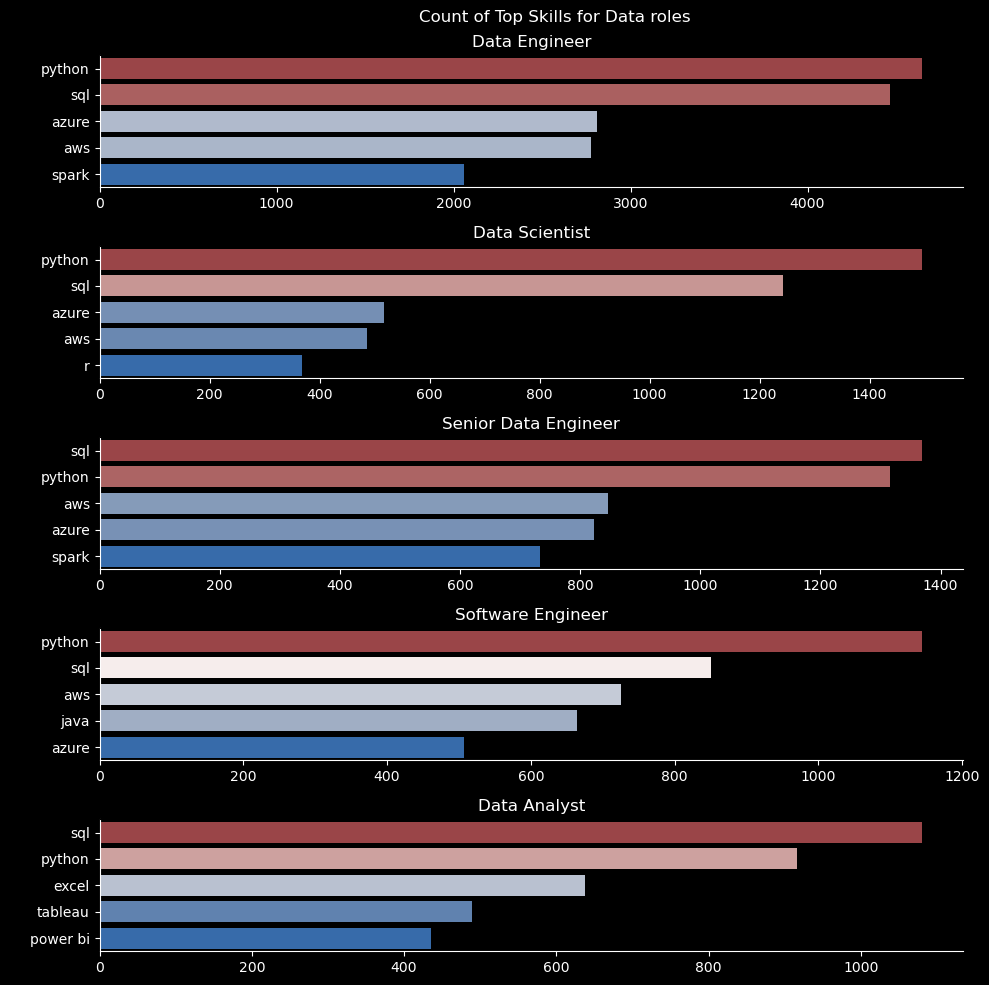

In [20]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10,10))

for i, job_title in enumerate(job_titles):
    sns.barplot(data=df_skills_count[df_skills_count['job_title_short'] == job_title].head(5), 
                x='skill_count', 
                y='job_skills', 
                hue='skill_count', 
                palette='vlag', 
                ax=ax[i])
    
    ax[i].set_facecolor('black')
    ax[i].tick_params(axis='x', color='white', labelcolor='white')
    ax[i].tick_params(axis='y', color='white', labelcolor='white')
    ax[i].set_xlabel('', color='white')
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[::-1], labels[::-1], title='Count')
    ax[i].spines['bottom'].set_color('white')
    ax[i].spines['left'].set_color('white')
    ax[i].set_title(f'{job_title}', color='white')
    ax[i].legend().set_visible(False)
    
fig.patch.set_facecolor('black')

fig.suptitle('Count of Top Skills for Data roles', color='white', x=0.56)
plt.tight_layout()
plt.show()

#### Getting the skill percentaje (based on the total amount of job postings)

In [22]:
# Getting the total count of the job title by job postings
df_job_title_count = (df_ca['job_title_short'].value_counts()
                      .reset_index(name='jobs_total'))

# Merging the data frames for skills count and job titles count
df_skills_per = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

# Getting the percentaje of the skills based on the job postings for each job roles
df_skills_per['skill_per'] = 100 * df_skills_per['skill_count'] / df_skills_per['jobs_total'] 



#### Plotting the percentaje of skills based on the job_postings

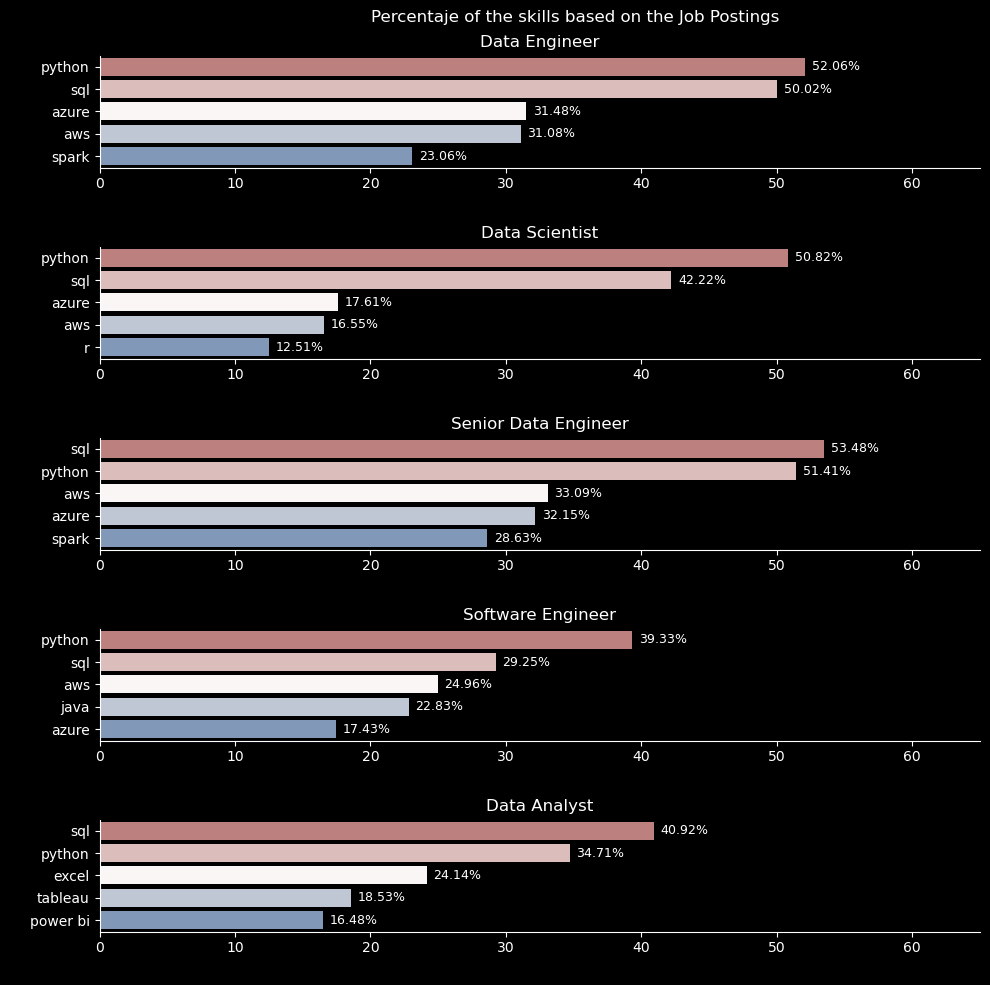

In [23]:
# Plotting
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10,10))

# Lop to plot the 5 top job roles
for i, job_title in enumerate(job_titles):
    sns.barplot(data=df_skills_per[df_skills_per['job_title_short'] == job_title].head(5), 
                x='skill_per', 
                y='job_skills', 
                ax=ax[i], 
                hue='job_skills', 
                dodge=False, 
                legend=False, 
                palette='vlag_r')
    
    ax[i].set_facecolor('black')
    ax[i].tick_params(labelcolor='white', color='white')
    ax[i].spines['bottom'].set_color('white')
    ax[i].spines['left'].set_color('white')
    ax[i].set_title(job_title, color='white')
    ax[i].set_xlim(0, 65)
    
     #  Add percentage labels to the right of each bar 
    for p in ax[i].patches:
        width = p.get_width()
        y = p.get_y() + p.get_height()/2
        ax[i].text(width + 0.5, y, f"{width:.2f}%", va='center', ha='left', color='white', fontsize=9)
    
fig.patch.set_facecolor('black')
fig.suptitle('Percentaje of the skills based on the Job Postings', color='white', x=0.58)

fig.tight_layout()
plt.show()